In [ ]:
% pip install opencv-python-headless

In [2]:
import json
import os
from PIL import Image
import pybboxes as pbx
import yaml
import shutil
import random
from collections import Counter, defaultdict
import cv2
from object_detection.src.data import create_filtered_coco_dataset, coco_to_yolo

In [1]:
import sys
sys.path.append('/home/LIBS/jozefov/projects/object_detection_avaltar')

In [ ]:
%pip uninstall opencv-python-headless
%pip install opencv-python-headless

# Create filtered val coco dataset

In [2]:
# # Filter only groups you want from coco
# !python ../../../libs/coco_manager/filter.py --input_json /home/LIBS/jozefov/projects/object_detection_avaltar/object_detection/data/coco/annotations/instances_val2017.json --output_json /home/LIBS/jozefov/projects/object_detection_avaltar/object_detection/data/coco_filt_avaltar/annotations/filtered_val.json --categories person dog cat

Output path already exists. Overwrite? (y/n) 

^C
Traceback (most recent call last):
  File "/home/LIBS/jozefov/projects/object_detection_avaltar/object_detection/src/final/../../../libs/coco_manager/filter.py", line 171, in <module>
    cf.main(args)
  File "/home/LIBS/jozefov/projects/object_detection_avaltar/object_detection/src/final/../../../libs/coco_manager/filter.py", line 114, in main
    should_continue = input('Output path already exists. Overwrite? (y/n) ').lower()
KeyboardInterrupt


In [9]:
# truck bus car motorcycle person
# Filter only groups you want from coco
!python ../../../libs/coco_manager/filter.py --input_json /home/LIBS/jozefov/projects/object_detection_avaltar/object_detection/data/coco/annotations/instances_val2017.json --output_json /home/LIBS/jozefov/projects/object_detection_avaltar/object_detection/data/coco_filt_avaltar/annotations/filtered_val.json --categories truck bus car motorcycle person

Loading json file...


Processing input json...
Filtering...
Saving new json file...
Filtered json saved.


In [13]:
import json
# filter_path = "/home/LIBS/jozefov/projects/object_detection_avaltar/object_detection/data/coco_filt_avaltar/annotations/filtered_val.json"
filter_path = "/home/LIBS/jozefov/projects/object_detection_avaltar/object_detection/data/coco_filt_avaltar/annotations/filtered_train.json"
with open(filter_path, 'r') as f:
    data = json.load(f)

categories = data['categories']
category_id_to_name = {category['id']: category['name'] for category in categories}

for category_id, category_name in category_id_to_name.items():
    print(f"ID: {category_id}, Name: {category_name}")

ID: 1, Name: person
ID: 2, Name: car
ID: 3, Name: motorcycle
ID: 4, Name: bus
ID: 5, Name: truck


In [11]:
import os
# Define base paths
original_base = "/home/LIBS/jozefov/projects/object_detection_avaltar/object_detection/data/coco"
filtered_base = "/home/LIBS/jozefov/projects/object_detection_avaltar/object_detection/data/coco_filt_avaltar"

dataset_types = ['train', 'val']  # Using 'train' and 'val' instead of 'train2017' and 'val2017'

# Create necessary directories within coco_filtered
for dataset_type in dataset_types:
    os.makedirs(os.path.join(filtered_base, dataset_type), exist_ok=True)

# Create annotations directory
os.makedirs(os.path.join(filtered_base, "annotations"), exist_ok=True)

# Paths for validation dataset
original_val_annotation = os.path.join(original_base, "annotations", "filtered_val.json")
original_val_image_dir = "/home/LIBS/jozefov/projects/object_detection_avaltar/object_detection/data/coco/val2017"  
filtered_val_annotation = os.path.join(filtered_base, "annotations", "filtered_val.json")
filtered_val_image_dir = os.path.join(filtered_base, "val") 

In [12]:

# Then your create_filtered_coco_dataset call is correct
create_filtered_coco_dataset(
    original_annotation_path=original_val_annotation,
    original_image_dir=original_val_image_dir,
    filtered_annotation_path=filtered_val_annotation,
    filtered_image_dir=filtered_val_image_dir
)

Filtered dataset created successfully at /home/LIBS/jozefov/projects/object_detection_avaltar/object_detection/data/coco_filt_avaltar/val and /home/LIBS/jozefov/projects/object_detection_avaltar/object_detection/data/coco_filt_avaltar/annotations/filtered_val.json


### Create filtered train

In [14]:
# truck bus car motorcycle person
!python ../../../libs/coco_manager/filter.py --input_json /home/LIBS/jozefov/projects/object_detection_avaltar/object_detection/data/coco/annotations/instances_train2017.json --output_json /home/LIBS/jozefov/projects/object_detection_avaltar/object_detection/data/coco_filt_avaltar/annotations/filtered_train.json --categories truck bus car motorcycle person

Loading json file...


Processing input json...
Filtering...
Saving new json file...
Filtered json saved.


In [15]:
# Paths for training dataset (assuming you have a similar filtered_train.json)
original_train_annotation = os.path.join(original_base, "annotations", "filtered_train.json")
original_train_image_dir = "/home/LIBS/jozefov/projects/object_detection_avaltar/object_detection/data/coco/train2017"  
filtered_train_annotation = os.path.join(filtered_base, "annotations", "filtered_train.json")
filtered_train_image_dir = os.path.join(filtered_base, "train")  

In [16]:
create_filtered_coco_dataset(
    original_annotation_path=original_train_annotation,
    original_image_dir=original_train_image_dir,
    filtered_annotation_path=filtered_train_annotation,
    filtered_image_dir=filtered_train_image_dir
)

Filtered dataset created successfully at /home/LIBS/jozefov/projects/object_detection_avaltar/object_detection/data/coco_filt_avaltar/train and /home/LIBS/jozefov/projects/object_detection_avaltar/object_detection/data/coco_filt_avaltar/annotations/filtered_train.json


## Coco format annotation to YOLO

### Transform to YOLO Val

In [3]:
# Paths for validation dataset
filtered_base = "/home/LIBS/jozefov/projects/object_detection_avaltar/object_detection/data/coco_filt_avaltar"
filtered_val_annotation = os.path.join(filtered_base, "annotations", "filtered_val.json")
filtered_val_image_dir = os.path.join(filtered_base, "val") 

In [4]:
coco_to_yolo(
    coco_annotation_path=filtered_val_annotation,
    images_dir=filtered_val_image_dir,
    output_dir=os.path.join(filtered_base, "annotations", "yolo_format_val"),
    yaml_output_path= os.path.join(filtered_base, "annotations", "data_val.yaml"),
)

YOLO annotations and data.yaml have been saved to /home/LIBS/jozefov/projects/object_detection_avaltar/object_detection/data/coco_filt_avaltar/annotations/yolo_format_val


### Transform to YOLO Train

In [5]:
filtered_train_annotation = os.path.join(filtered_base, "annotations", "filtered_train.json")
filtered_train_image_dir = os.path.join(filtered_base, "train")  

In [6]:
coco_to_yolo(
    coco_annotation_path=filtered_train_annotation,
    images_dir=filtered_train_image_dir,
    output_dir=os.path.join(filtered_base, "annotations", "yolo_format_train"),
    yaml_output_path= os.path.join(filtered_base, "annotations", "data_train.yaml"),
)

Removed problematic image file: /home/LIBS/jozefov/projects/object_detection_avaltar/object_detection/data/coco_filt_avaltar/train/000000550395.jpg
YOLO annotations and data.yaml have been saved to /home/LIBS/jozefov/projects/object_detection_avaltar/object_detection/data/coco_filt_avaltar/annotations/yolo_format_train
Total removed images: 1


## Train model

In [4]:
dataset_params = {
    'data_dir': filtered_base,
    'train_images_dir': 'train/',
    'train_labels_dir': 'annotations/yolo_format_train',
    'val_images_dir': 'val/',
    'val_labels_dir': 'annotations/yolo_format_val',
    'test_images_dir': 'val/',
    'test_labels_dir': 'annotations/yolo_format_val',
    'classes': ['person', 'cat', 'dog']
}

In [5]:
import torch
from super_gradients.training import Trainer
from super_gradients.training import dataloaders
from super_gradients.training.dataloaders.dataloaders import coco_detection_yolo_format_train, coco_detection_yolo_format_val
from super_gradients.training import models
from super_gradients.training.losses import PPYoloELoss
from super_gradients.training.metrics import DetectionMetrics_050
from super_gradients.training.models.detection_models.pp_yolo_e import PPYoloEPostPredictionCallback

[2024-12-15 18:48:46] INFO - crash_tips_setup.py - Crash tips is enabled. You can set your environment variable to CRASH_HANDLER=FALSE to disable it


The console stream is logged into /home/LIBS/jozefov/sg_logs/console.log


[2024-12-15 18:48:46] WARNING - __init__.py - Failed to import pytorch_quantization
[2024-12-15 18:48:48] WARNING - calibrator.py - Failed to import pytorch_quantization
[2024-12-15 18:48:48] WARNING - export.py - Failed to import pytorch_quantization
[2024-12-15 18:48:48] WARNING - selective_quantization_utils.py - Failed to import pytorch_quantization


In [ ]:
from IPython.display import clear_output

train_data = coco_detection_yolo_format_train(
    dataset_params={
        'data_dir': dataset_params['data_dir'],
        'images_dir': dataset_params['train_images_dir'],
        'labels_dir': dataset_params['train_labels_dir'],
        'classes': dataset_params['classes']
    },
    dataloader_params={
        'batch_size':8,
        'num_workers':2
    }
)

val_data = coco_detection_yolo_format_val(
    dataset_params={
        'data_dir': dataset_params['data_dir'],
        'images_dir': dataset_params['val_images_dir'],
        'labels_dir': dataset_params['val_labels_dir'],
        'classes': dataset_params['classes']
    },
    dataloader_params={
        'batch_size':8,
        'num_workers':2
    }
)

test_data = coco_detection_yolo_format_val(
    dataset_params={
        'data_dir': dataset_params['data_dir'],
        'images_dir': dataset_params['test_images_dir'],
        'labels_dir': dataset_params['test_labels_dir'],
        'classes': dataset_params['classes']
    },
    dataloader_params={
        'batch_size':8,
        'num_workers':2
    }
)

clear_output()

Indexing dataset annotations: 100%|██████████| 2945/2945 [00:01<00:00, 2882.32it/s]


In [7]:
train_data.dataset.transforms

[DetectionMosaic('additional_samples_count': 3, 'non_empty_targets': False, 'prob': 1.0, 'input_dim': (640, 640), 'enable_mosaic': True, 'border_value': 114),
 DetectionRandomAffine('additional_samples_count': 0, 'non_empty_targets': False, 'degrees': 10.0, 'translate': 0.1, 'scale': [0.1, 2], 'shear': 2.0, 'target_size': (640, 640), 'enable': True, 'filter_box_candidates': True, 'wh_thr': 2, 'ar_thr': 20, 'area_thr': 0.1, 'border_value': 114),
 DetectionMixup('additional_samples_count': 1, 'non_empty_targets': True, 'input_dim': (640, 640), 'mixup_scale': [0.5, 1.5], 'prob': 1.0, 'enable_mixup': True, 'flip_prob': 0.5, 'border_value': 114),
 DetectionHSV('additional_samples_count': 0, 'non_empty_targets': False, 'prob': 1.0, 'hgain': 5, 'sgain': 30, 'vgain': 30, 'bgr_channels': (0, 1, 2), '_additional_channels_warned': False),
 DetectionHorizontalFlip('additional_samples_count': 0, 'non_empty_targets': False, 'prob': 0.5),
 DetectionPaddedRescale('additional_samples_count': 0, 'non_em

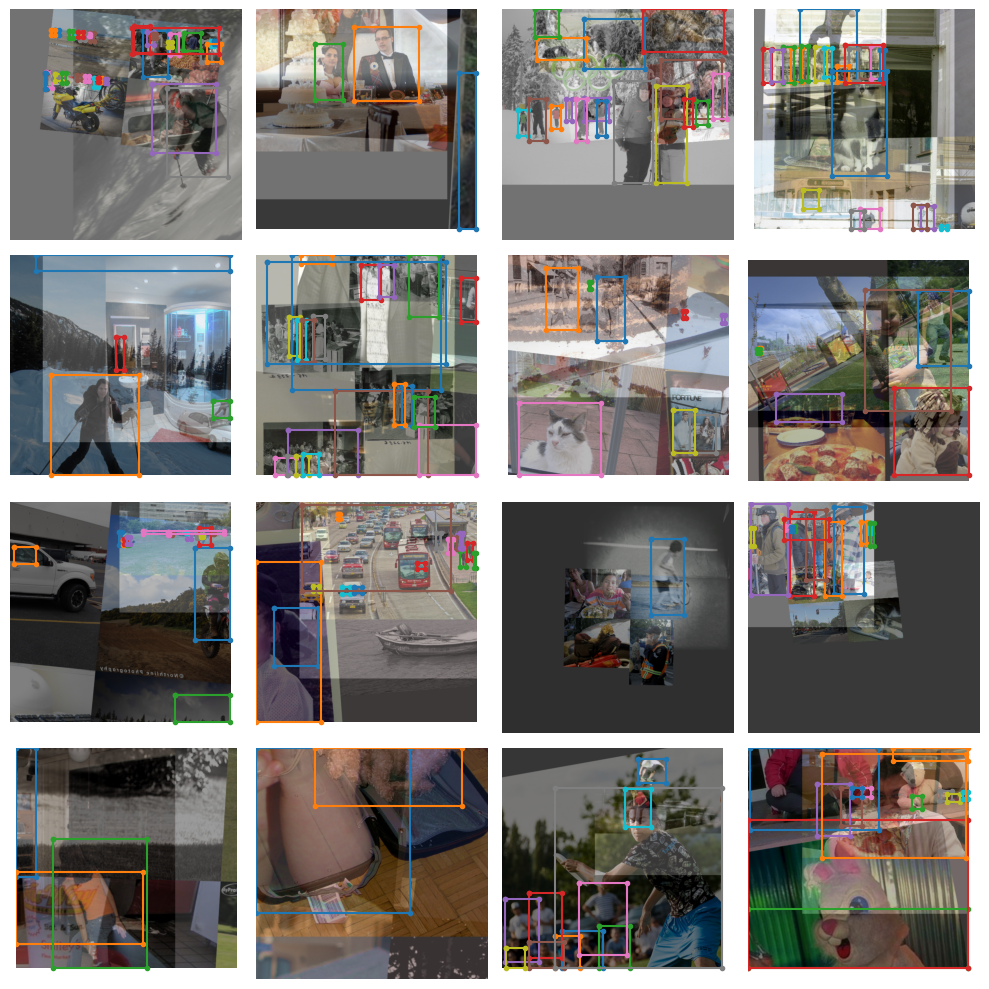

In [8]:
train_data.dataset.plot()

In [11]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [12]:
from super_gradients.training import Trainer

CHECKPOINT_DIR = 'checkpoints'
trainer = Trainer(experiment_name='my_first_yolonas_run', ckpt_root_dir=CHECKPOINT_DIR)

In [9]:
model = models.get('yolo_nas_s',
                   num_classes=len(dataset_params['classes']),
                   pretrained_weights="coco"
                   )

[2024-12-15 18:49:31] INFO - checkpoint_utils.py - License Notification: YOLO-NAS pre-trained weights are subjected to the specific license terms and conditions detailed in 
https://github.com/Deci-AI/super-gradients/blob/master/LICENSE.YOLONAS.md
By downloading the pre-trained weight files you agree to comply with these terms.
[2024-12-15 18:49:31] INFO - checkpoint_utils.py - Successfully loaded pretrained weights for architecture yolo_nas_s


In [10]:
from super_gradients.training.losses import PPYoloELoss
from super_gradients.training.metrics import DetectionMetrics_050
from super_gradients.training.models.detection_models.pp_yolo_e import PPYoloEPostPredictionCallback

train_params = {
    # ENABLING SILENT MODE
    'silent_mode': False,
    "average_best_models":True,
    "warmup_mode": "linear_epoch_step",
    "warmup_initial_lr": 1e-6,
    "lr_warmup_epochs": 3,
    "initial_lr": 5e-4,
    "lr_mode": "cosine",
    "cosine_final_lr_ratio": 0.1,
    "optimizer": "Adam",
    "optimizer_params": {"weight_decay": 0.0001},
    "zero_weight_decay_on_bias_and_bn": True,
    "ema": True,
    "ema_params": {"decay": 0.9, "decay_type": "threshold"},
    # ONLY TRAINING FOR 10 EPOCHS FOR THIS EXAMPLE NOTEBOOK
    "max_epochs": 2,
    "mixed_precision": True,
    "loss": PPYoloELoss(
        use_static_assigner=False,
        # NOTE: num_classes needs to be defined here
        num_classes=len(dataset_params['classes']),
        reg_max=16
    ),
    "valid_metrics_list": [
        DetectionMetrics_050(
            score_thres=0.1,
            top_k_predictions=300,
            # NOTE: num_classes needs to be defined here
            num_cls=len(dataset_params['classes']),
            normalize_targets=True,
            post_prediction_callback=PPYoloEPostPredictionCallback(
                score_threshold=0.01,
                nms_top_k=1000,
                max_predictions=300,
                nms_threshold=0.7
            )
        )
    ],
    "metric_to_watch": 'mAP@0.50'
}


In [14]:
trainer.train(model=model,
              training_params=train_params,
              train_loader=train_data,
              valid_loader=val_data)

[2024-12-15 18:51:20] INFO - sg_trainer.py - Starting a new run with `run_id=RUN_20241215_185120_411987`
[2024-12-15 18:51:20] INFO - sg_trainer.py - Checkpoints directory: checkpoints/my_first_yolonas_run/RUN_20241215_185120_411987
[2024-12-15 18:51:20] INFO - sg_trainer.py - Using EMA with params {'decay': 0.9, 'decay_type': 'threshold'}


The console stream is now moved to checkpoints/my_first_yolonas_run/RUN_20241215_185120_411987/console_Dec15_18_51_20.txt


/home/LIBS/jozefov/miniconda3/envs/avaltar_2/lib/python3.9/site-packages/super_gradients/common/registry/registry.py:72: DeprecationWarning: Object name `linear_epoch_step` is now deprecated. Please replace it with `LinearEpochLRWarmup`.
  warnings.warn(f"Object name `{name}` is now deprecated. Please replace it with `{deprecated_names[name]}`.", DeprecationWarning)
/home/LIBS/jozefov/miniconda3/envs/avaltar_2/lib/python3.9/site-packages/super_gradients/training/utils/optimizer_utils.py:107: DeprecationWarning: initialize_param_groups and update_param_groups usages are deprecated since 3.4.0, will be removed in 3.5.0 and have no effect. 
 Assign different learning rates by passing a mapping of layer name prefixes to lr values through initial_lr training hyperparameter (i.e initial_lr={'backbone': 0.01, 'default':0.1})
  warnings.warn(
/home/LIBS/jozefov/miniconda3/envs/avaltar_2/lib/python3.9/site-packages/super_gradients/training/sg_trainer/sg_trainer.py:1690: FutureWarning: `torch.cu

Train epoch 0:   1%|▏         | 110/8714 [00:11<15:08,  9.47it/s, PPYoloELoss/loss=3.68, PPYoloELoss/loss_cls=2.25, PPYoloELoss/loss_dfl=0.715, PPYoloELoss/loss_iou=0.712, gpu_mem=3.54]
[2024-12-15 18:51:32] INFO - sg_trainer.py - 
[MODEL TRAINING EXECUTION HAS BEEN INTERRUPTED]... Please wait until SOFT-TERMINATION process finishes and saves all of the Model Checkpoints and log files before terminating...
[2024-12-15 18:51:32] INFO - sg_trainer.py - For HARD Termination - Stop the process again
[2024-12-15 18:51:32] INFO - base_sg_logger.py - [CLEANUP] - Successfully stopped system monitoring process


In [13]:
device

'cuda'